## **project-5 Fraud Detection** ##
Prepared for: ExxpertSCM Thoughtware Training Pvt Ltd.


Guided by:  Mr. Pattabhi Raman


Fraud detection in the supply chain is an important area of focus for businesses to safeguard their operations, minimize financial losses, and maintain the integrity of their supply chain processes. Fraud can occur at various stages of the supply chain, including procurement, inventory management, transportation, and distribution.

In [ ]:
## importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.mstats import winsorize

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fraud_detection_dataset.csv to fraud_detection_dataset.csv


In [ ]:
## reading dataset
data = pd.read_csv(io.BytesIO(uploaded['fraud_detection_dataset.csv']),encoding='latin-1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
data.shape

(180519, 53)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
## creating new column from existing columns
data['Total_price']=data['Order Item Quantity']*data['Order Item Total']


In [ ]:
data['order_yr']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour

In [ ]:
## droppping the un necessary columns from the dataset
df = data.drop(['Sales per customer','Category Id','Customer Email','Customer Fname','Customer Id',
                'Customer Lname','Customer Street','Customer Zipcode','Customer Password','Department Id','Latitude',
                'Longitude','Order Customer Id','order date (DateOrders)','Order Id','Order Item Cardprod Id',
                'Order Item Discount','Order Item Id','Order Item Product Price','Order Item Profit Ratio',
                'Sales','Order Item Total','Order Profit Per Order','Product Status','Product Description','Product Card Id',
                'Product Category Id','Product Image','Order Zipcode','shipping date (DateOrders)'],axis='columns')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,...,Order State,Order Status,Product Name,Product Price,Shipping Mode,Total_price,order_yr,order_month,order_day,order_hour
0,DEBIT,3,4,91.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,...,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,314.640015,2018,1,2,22
1,TRANSFER,5,4,-249.089996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,...,Rajastán,PENDING,Smart watch,327.75,Standard Class,311.359985,2018,1,5,12
2,CASH,4,4,-247.779999,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,...,Rajastán,CLOSED,Smart watch,327.75,Standard Class,309.720001,2018,1,5,12
3,DEBIT,3,4,22.860001,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,...,Queensland,COMPLETE,Smart watch,327.75,Standard Class,304.809998,2018,1,5,11
4,PAYMENT,2,4,134.210007,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,...,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,298.250000,2018,1,5,11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
## descriptive statistics of the numerical columns
num_cols = df.select_dtypes(include = ['float64','int64'])
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.00000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.00000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Late_delivery_risk,180519.0,0.548291,0.497664,0.00000,0.000000,1.000000,1.000000,1.000000
Order Item Discount Rate,180519.0,0.101668,0.070415,0.00000,0.040000,0.100000,0.160000,0.250000
Order Item Quantity,180519.0,2.127638,1.453451,1.00000,1.000000,1.000000,3.000000,5.000000
Product Price,180519.0,141.232550,139.732492,9.99000,50.000000,59.990002,199.990005,1999.989990
Total_price,180519.0,407.978685,418.505725,7.49000,127.389999,263.980011,469.710022,2499.750061
order_yr,180519.0,2015.971150,0.829429,2015.00000,2015.000000,2016.000000,2017.000000,2018.000000
order_month,180519.0,6.235449,3.403571,1.00000,3.000000,6.000000,9.000000,12.000000


In [ ]:
## descriptive statistics of the categorical dataset.
cat_cols = df.select_dtypes(include = 'object')
cat_cols.describe().T

,count,unique,top,freq
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Category Name,180519,50,Cleats,24551
Customer City,180519,563,Caguas,66770
Customer Country,180519,2,EE. UU.,111146
Customer Segment,180519,3,Consumer,93504
Customer State,180519,46,PR,69373
Department Name,180519,11,Fan Shop,66861
Market,180519,5,LATAM,51594
Order City,180519,3597,Santo Domingo,2211


In [ ]:
df.duplicated().sum()


0

In [ ]:
## checking for the null values.
df.isnull().values.any()

False

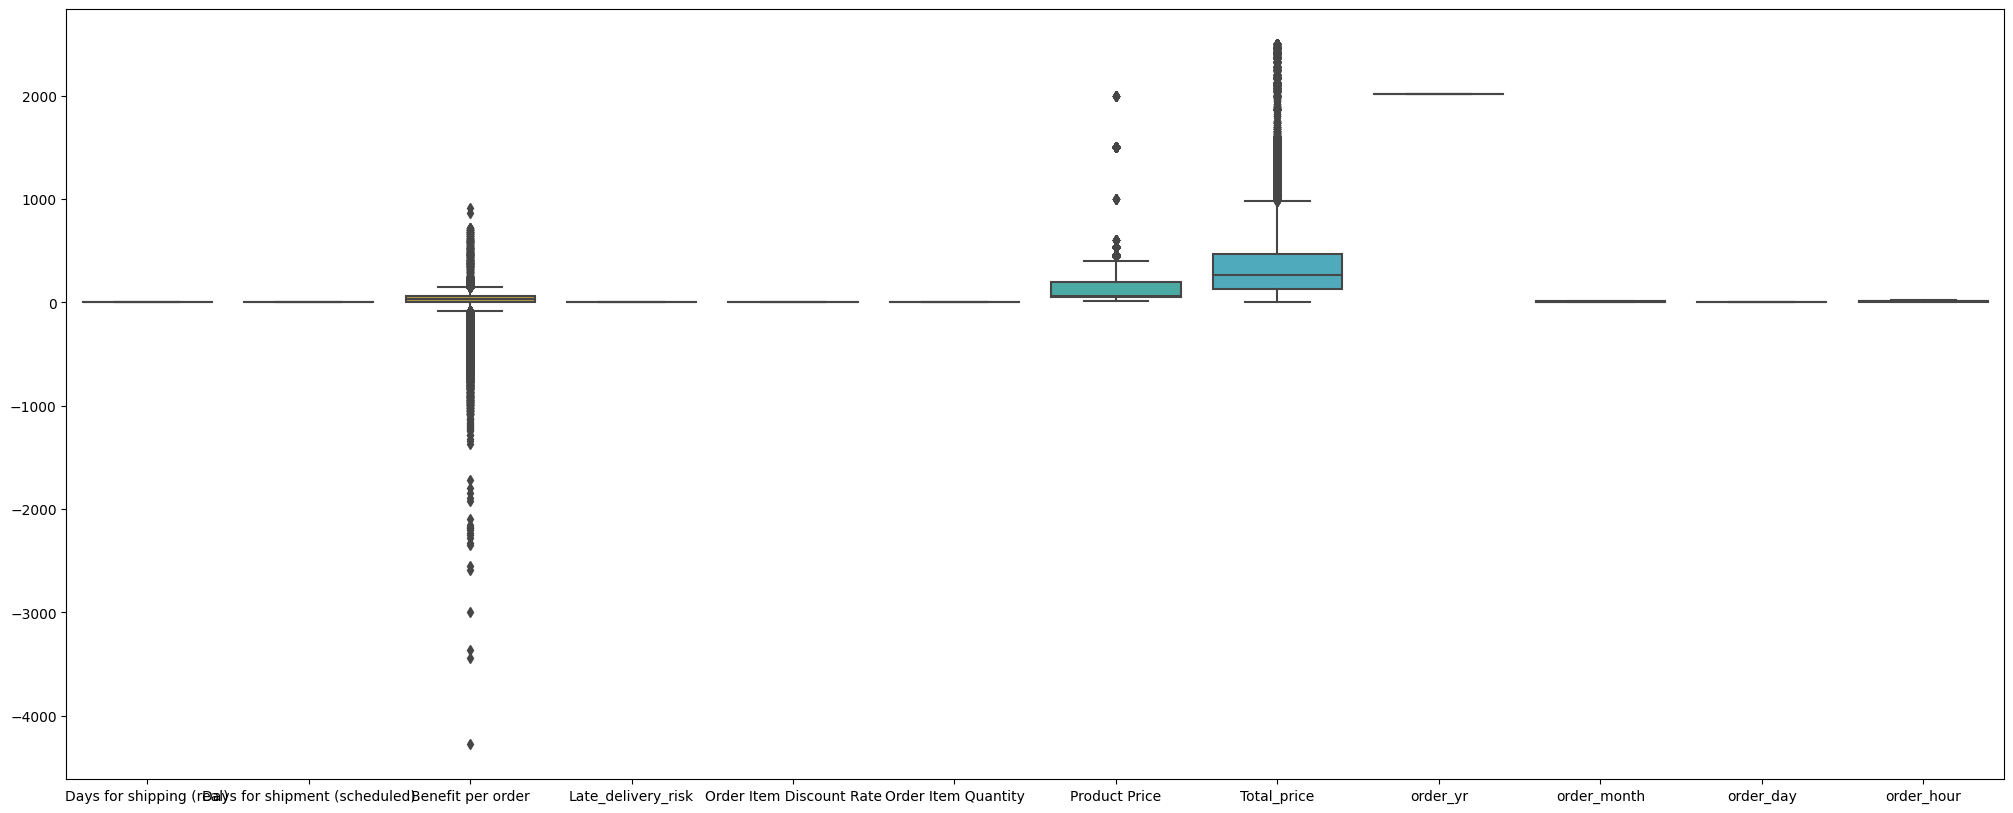

In [ ]:
## detecting outliers
plt.figure(figsize=(25,10))
sns.boxplot(data = num_cols)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
# handling outliers using winsorize method
for col in df[['Benefit per order','Product Price','Total_price']]:
    df[col] = winsorize(df[col],limits=[0.02,0.05])

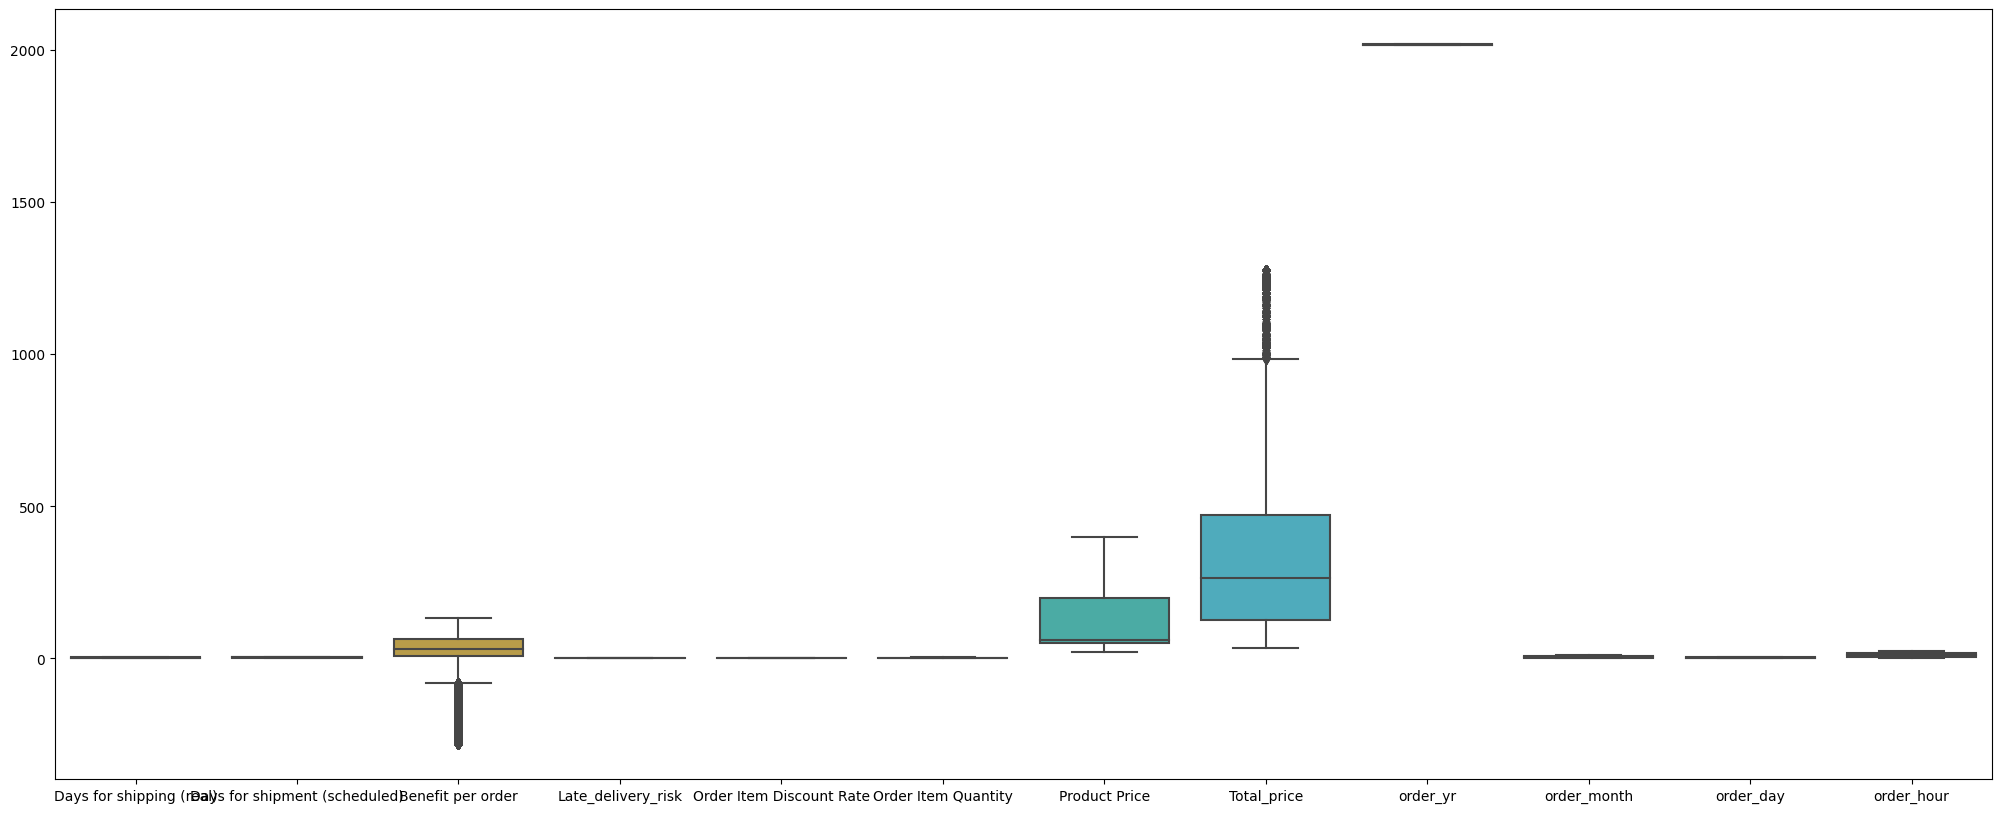

In [ ]:
## boxplot plotted after removal of outliers
plt.figure(figsize=(25,10))
sns.boxplot(data = df.select_dtypes(exclude=['object']))
plt.show()

## Data Visulaization
Data visualization techniques are used for better undersatnding of the data and its distribution. we use heatmap to understand the correlation between the feature columns. From the heatmap we can see that there is weakly correlated data and mulicollinearity is not that present.

barplot for the loss making products, loss making markets is plotted.

In [ ]:
loss = df[(df['Benefit per order']<0)]

Text(0.5, 1.0, '10 Loss making products')

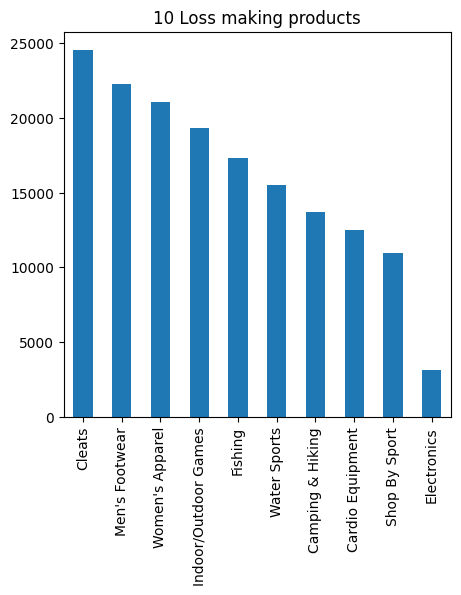

In [ ]:
plt.figure(figsize=(5,5))
df['Category Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title("10 Loss making products")

Text(0.5, 1.0, 'Loss making markets')

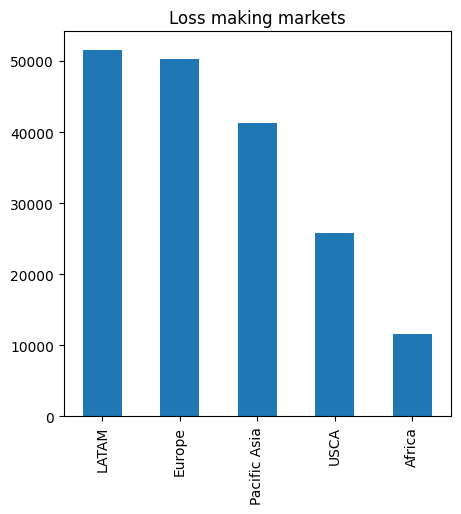

In [ ]:
plt.figure(figsize=(5,5))
df['Market'].value_counts().plot(kind='bar')
plt.title("Loss making markets")

Here we are trying to predict the fraudant activity. In this dataset we didn't have the direct column deling with fraudant activity but we can encode the order status column by giving 1 to suspected fraud in that column and the rest as 0. From the status_df we can conclude that the susupected fraud activity is done by the transfer of money. and about 4062 data is considered as susupected fraud.

In [ ]:
status = df.groupby('Type')['Order Status'].value_counts()
status_df = status.to_frame()
status_df

Order Status
Type     Order Status                 
CASH     CLOSED                  19616
DEBIT    COMPLETE                59491
         ON_HOLD                  9804
PAYMENT  PENDING_PAYMENT         39832
         PAYMENT_REVIEW           1893
TRANSFER PROCESSING              21902
         PENDING                 20227
         SUSPECTED_FRAUD          4062
         CANCELED                 3692

In [ ]:
fraud_region = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]

Here we used visualization technique to plot the products with fraudant activity. largest 10 products with fraduant transaction is shown in the barplot.

Text(0.5, 1.0, 'Products with fraudant activity')

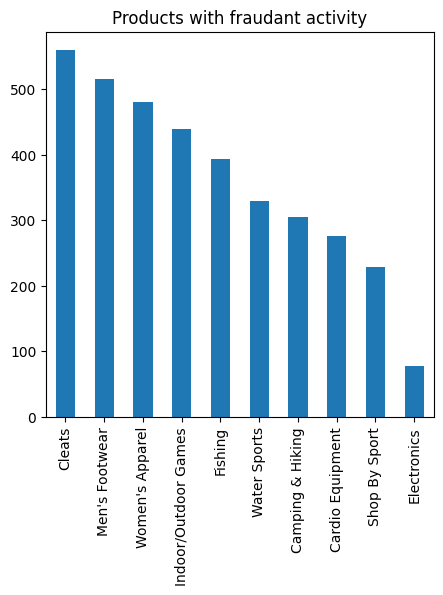

In [ ]:
plt.figure(figsize=(5,5))
fraud_region['Category Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Products with fraudant activity")

In [ ]:
## making a copy of the dataset df1
df1 = df.copy()

In [ ]:
# Creating Binary enocode for Suspected Fraud and Late delivery
df1['late_delivery']=np.where(df1['Delivery Status'] == 'Late delivery', 1, 0).astype('int64')
df1['fraud'] = np.where(df1['Order Status'] == 'SUSPECTED_FRAUD', 1, 0).astype('int64')
df1['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

From plotting the countplot we understood that our data is highly imbalanced inorder to balance the data we need to over sample the data so we use SMOTE method for oversampling the miniority data that is fraud == 1 and make it into the same size as majority data. Inorder to do that we need to seperate the features and target variables. So we fisrt remove the unwanted columns and then label encode the data and later standarised these columns 'Benefit per order','Total_price','Product Price','Order Profit Per Order', inorder to make our analysis more productive. Then we create a sample data from the original data. Defined the traget and features variables and then used SMOTE for balancing the data. Then splitted the data into training and testing dataset.

In [ ]:
## dropping the columns which aren't necessary anymore.
df1.drop(['Delivery Status','Late_delivery_risk','Order Status','Benefit per order'], axis=1, inplace=True)

In [ ]:
df1.shape

(180519, 26)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Category Name                  180519 non-null  object 
 4   Customer City                  180519 non-null  object 
 5   Customer Country               180519 non-null  object 
 6   Customer Segment               180519 non-null  object 
 7   Customer State                 180519 non-null  object 
 8   Department Name                180519 non-null  object 
 9   Market                         180519 non-null  object 
 10  Order City                     180519 non-null  object 
 11  Order Country                  180519 non-null  object 
 12  Order Item Discount Rate      

<Axes: >

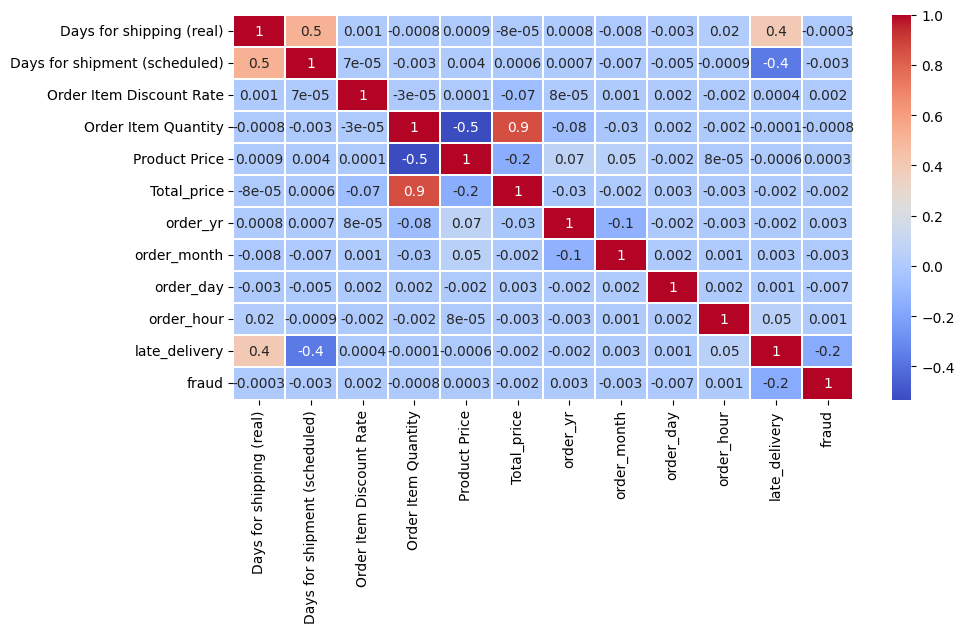

In [ ]:
## for observing the correlation between each column haet map is plotted.
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')


In [ ]:
df1.nunique()

Type                                4
Days for shipping (real)            7
Days for shipment (scheduled)       4
Category Name                      50
Customer City                     563
Customer Country                    2
Customer Segment                    3
Customer State                     46
Department Name                    11
Market                              5
Order City                       3597
Order Country                     164
Order Item Discount Rate           18
Order Item Quantity                 5
Order Region                       23
Order State                      1089
Product Name                      118
Product Price                      60
Shipping Mode                       4
Total_price                      2702
order_yr                            4
order_month                        12
order_day                           7
order_hour                         24
late_delivery                       2
fraud                               2
dtype: int64

In [ ]:
## label encoding the data so that we can do our data mdoelling
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df1['Type'] = le.fit_transform(df1['Type']).astype('int64')
df1['Category Name'] = le.fit_transform(df1['Category Name']).astype('int64')
df1['Customer City'] = le.fit_transform(df1['Customer City']).astype('int64')
df1['Customer Country'] = le.fit_transform(df1['Customer Country']).astype('int64')
df1['Customer Segment'] = le.fit_transform(df1['Customer Segment']).astype('int64')
df1['Customer State'] = le.fit_transform(df1['Customer State']).astype('int64')
df1['Department Name'] = le.fit_transform(df1['Department Name']).astype('int64')
df1['Market'] = le.fit_transform(df1['Market']).astype('int64')
df1['Order City'] = le.fit_transform(df1['Order City']).astype('int64')
df1['Order Country'] = le.fit_transform(df1['Order Country']).astype('int64')
df1['Order State'] = le.fit_transform(df1['Order State']).astype('int64')
df1['Order Region'] = le.fit_transform(df1['Order Region']).astype('int64')
df1['Product Name'] = le.fit_transform(df1['Product Name']).astype('int64')
df1['Shipping Mode'] = le.fit_transform(df1['Shipping Mode']).astype('int64')

In [ ]:
ss = StandardScaler()
df1[['Total_price','Product Price']] = pd.DataFrame(ss.fit_transform(df1[['Total_price','Product Price']]))
df1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,...,Product Name,Product Price,Shipping Mode,Total_price,order_yr,order_month,order_day,order_hour,late_delivery,fraud
0,1,3,4,40,66,1,0,36,4,3,...,78,1.584898,3,-0.209075,2018,1,2,22,0,0
1,3,5,4,40,66,1,0,36,4,3,...,78,1.584898,3,-0.218316,2018,1,5,12,1,0
2,0,4,4,40,452,0,0,5,4,3,...,78,1.584898,3,-0.222937,2018,1,5,12,0,0
3,1,3,4,40,285,0,2,5,4,3,...,78,1.584898,3,-0.236770,2018,1,5,11,0,0
4,2,2,4,40,66,1,1,36,4,3,...,78,1.584898,3,-0.255252,2018,1,5,11,0,0


In [ ]:
## a sample dataset for validation is created.
sample_df = df1.sample(frac=0.01,random_state=1)
sample_df.shape

(1805, 26)

In [ ]:
df1 = df1.drop(sample_df.index)
df1.shape

(178714, 26)

In [ ]:
## defining the feature and traget variables
X = df1.loc[:,df1.columns != 'fraud']
y = df1['fraud']

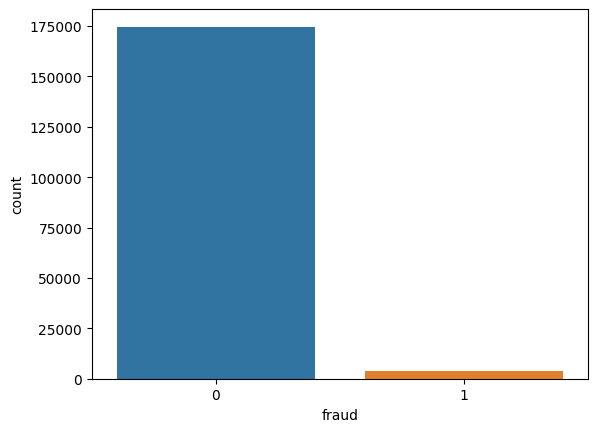

In [ ]:
sns.countplot(x = df1['fraud'],data = df1)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'minority',random_state=42)
X, y = sm.fit_resample(X, y)

# Create a new dataframe with resampled data
df1 = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

# Check the value counts of the target variable after oversampling
print(df1['fraud'].value_counts())


0    174681
1    174681
Name: fraud, dtype: int64


In [ ]:
## splitting the dataset into training and testing dataset using train_test_spilt
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 42)

#### MLP classifier
MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.MLPs are suitable for classification prediction problems where inputs are assigned a class or label.  MLP utilizes a chain rule based supervised learning technique called backpropagation or reverse mode of automatic differentiation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_fscore_support
mlp = MLPClassifier(hidden_layer_sizes=(6), activation='logistic', solver='lbfgs',random_state=1)
mlp.fit(Xtrain,ytrain)

MLPClassifier(activation='logistic', hidden_layer_sizes=6, random_state=1,
              solver='lbfgs')

In [ ]:
mlptrain_pred = mlp.predict(Xtrain)

In [ ]:
mlppred = mlp.predict(Xtest)

In [ ]:
print(confusion_matrix(ytest,mlppred))

[[    0 52453]
 [    0 52356]]


In [ ]:
print('train data accuracy', accuracy_score(ytrain,mlptrain_pred))
print('test data accuracy', accuracy_score(ytest,mlppred))
print('precision,recall and fscore', precision_recall_fscore_support(ytest, mlppred, average='macro'))

train data accuracy 0.5001983210183477
test data accuracy 0.49953725348014005
precision,recall and fscore (0.24976862674007003, 0.5, 0.33312760474660386, None)


#### Decision Tree Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 10)
dtc.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=10)

In [ ]:
dtctrain_pred = dtc.predict(Xtrain)

In [ ]:
dtcpred = dtc.predict(Xtest)

In [ ]:
print(confusion_matrix(ytest,dtcpred))

[[48783  3670]
 [ 1399 50957]]


In [ ]:
print('train data accuracy',accuracy_score(ytrain,dtctrain_pred))
print('test data accuracy', accuracy_score(ytest,dtcpred))
print('precision,recall and fscore',precision_recall_fscore_support(ytest, dtcpred, average='macro'))

train data accuracy 0.9536705744766983
test data accuracy 0.9516358328006183
precision,recall and fscore (0.9524692914576414, 0.9516558449627593, 0.9516150151107376, None)


#### Random Forest Classifier
"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 10)
rfc.fit(Xtrain, ytrain)
rfctrain_pred = rfc.predict(Xtrain)

In [ ]:
rfcpred = rfc.predict(Xtest)

In [ ]:
print(confusion_matrix(ytest,rfcpred))

[[47634  4819]
 [  189 52167]]


In [ ]:
print('train data accuracy',accuracy_score(ytrain,rfctrain_pred))
print('test data accuracy',accuracy_score(ytest,rfcpred))
print('precision,recall and fscore', precision_recall_fscore_support(ytest, rfcpred, average='macro'))

train data accuracy 0.9539854346501576
test data accuracy 0.9522178438874525
precision,recall and fscore (0.9557416484103578, 0.9522586872014941, 0.9521282964492567, None)


#### XGBoost Classifier
XGBoost classifier is a Machine learning algorithm that is applied for structured and tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost is an extreme gradient boost algorithm. And that means it’s a big Machine learning algorithm with lots of parts. XGBoost works with large, complicated datasets. XGBoost is an ensemble modelling technique.

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from catboost import CatBoostClassifier

In [ ]:
xgb = xgb.XGBClassifier(max_depth=5)
xgb.fit(Xtrain,ytrain)
xgbtrain_pred = xgb.predict(Xtrain)
xgbpred = xgb.predict(Xtest)

In [ ]:
confusion_matrix(ytest,xgbpred)

array([[52179,   274],
       [  666, 51690]])

In [ ]:
print('train data accuracy', accuracy_score(ytrain,xgbtrain_pred))
print('test data accuracy', accuracy_score(ytest,xgbpred))
print('precision,recall and fscore', precision_recall_fscore_support(ytest, xgbpred, average='macro'))

train data accuracy 0.992786839662568
test data accuracy 0.9910313045635394
precision,recall and fscore (0.9910621117574072, 0.9910278354079504, 0.9910311093278126, None)


Validaing our models using the sample dataset we created. From the four models we build random forest classifier and XGB classifier are the model with high accuracy, precision, recall and f-score. so we use those two models for validation and the predicted values is craeted into a dataset along with the dataset and we can compare it using the actual fraud data we have.

In [ ]:
## defining features and traget for sample dataset
Xsample = sample_df.loc[:,sample_df.columns != 'fraud']
ysample = sample_df['fraud']

<Axes: xlabel='fraud', ylabel='count'>

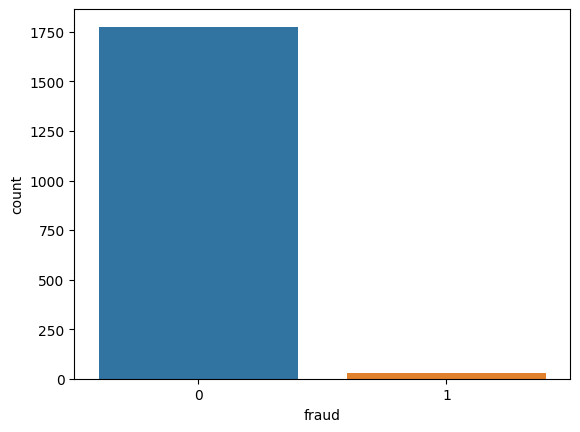

In [ ]:
sns.countplot(x = sample_df['fraud'],data = sample_df)

Since our data for validation is imbalance we balance it using RandomOverSampler.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsample, ysample = sm.fit_resample(Xsample, ysample)

sample_df = pd.concat([pd.DataFrame(Xsample),pd.DataFrame(ysample)],axis = 1)
sample_df ['fraud'].value_counts()

0    1776
1    1776
Name: fraud, dtype: int64

In [ ]:
## predicting validation dataset using XGB model
xgb_pred = xgb.predict(Xsample)

print(confusion_matrix(ysample,xgb_pred))
print('xgb_accuracy=',accuracy_score(ysample,xgb_pred))

[[1766   10]
 [  21 1755]]
xgb_accuracy= 0.9912725225225225


In [ ]:
precision_recall_fscore_support(ysample, xgb_pred, average='macro')

(0.9912913693641994, 0.9912725225225225, 0.9912724388211926, None)

In [ ]:
## predicting validation dataset using Random Forest classifier.
rfc_pred = rfc.predict(Xsample)

print(confusion_matrix(ysample,rfc_pred))
print('rfr_accuracy=',accuracy_score(ysample,rfc_pred))

[[1609  167]
 [   2 1774]]
rfr_accuracy= 0.9524211711711712


In [ ]:
precision_recall_fscore_support(ysample, rfc_pred, average='macro')

(0.9563602051966916, 0.9524211711711712, 0.9523182810027325, None)

In [ ]:
## predicted values uisng XGB and random forest model is added to the sample df
sample_df['predicted_fraud_xgb'] = xgb_pred
sample_df['Predicted_fraud_rfc'] = rfc_pred
dff = sample_df[sample_df['fraud']== 1]
dff.head(50)

,Type,Days for shipping (real),Days for shipment (scheduled),Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,...,Shipping Mode,Total_price,order_yr,order_month,order_day,order_hour,late_delivery,fraud,predicted_fraud_xgb,Predicted_fraud_rfc
40,3,6,4,12,146,0,1,5,0,1,...,3,1.554591,2017,8,0,0,0,1,0,1
80,3,3,4,38,66,1,1,36,6,2,...,3,0.418745,2015,3,5,15,0,1,0,1
201,3,3,4,9,66,1,0,36,3,2,...,3,-0.385611,2017,4,5,8,0,1,0,1
278,3,3,4,38,285,0,1,5,6,4,...,3,0.580912,2016,7,6,11,0,1,0,1
279,3,6,4,34,66,1,2,36,0,1,...,3,-0.762264,2017,8,3,10,0,1,1,1
346,3,5,4,47,152,0,1,6,6,2,...,3,-0.971565,2017,5,6,12,0,1,1,1
350,3,2,4,12,11,0,0,42,0,1,...,3,1.419357,2016,9,1,17,0,1,0,1
359,3,4,4,46,135,0,2,21,3,3,...,3,-0.537720,2015,12,4,21,0,1,0,1
415,3,6,4,38,451,0,1,5,6,1,...,3,0.653036,2015,6,1,14,0,1,1,1
462,3,3,4,30,318,0,0,10,3,3,...,3,-0.980073,2016,10,4,21,0,1,1,1


In [ ]:
sample_df['fraud'].value_counts()

0    1776
1    1776
Name: fraud, dtype: int64

In [ ]:
sample_df['predicted_fraud_xgb'].value_counts()

0    1787
1    1765
Name: predicted_fraud_xgb, dtype: int64

In [ ]:
sample_df['Predicted_fraud_rfc'].value_counts()

1    1941
0    1611
Name: Predicted_fraud_rfc, dtype: int64

From the training, testing and validating the models we can conclude that the XGB model predicts the Fraud transaction with an accuracy, precision, recall and f-score of 0.96. whereas the random forest has an accuracy of 0.93.

##### References
Dataset : https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?select=tokenized_access_logs.csv


Articles: https://github.com/subhanjandas/Artificial-Neural-Networks-for-Fraud-Detection-in-Supply-Chain-Analytics-MLPClassifier-and-Keras


https://www.qeios.com/read/1VZC8W#:~:text=By%20analyzing%20large%20data%20sets,not%20be%20able%20to%20identify.